In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ignore all warnings
warnings.filterwarnings('ignore')

C:\Users\WenJIE\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\WenJIE\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_bangi=pd.read_csv("comprehensive_income_2023_bangi.csv")
data_bangi

,MONTH,SALES,STOCKS_AT_THE_BEGINNING_OF_YEAR,PURCHASE,PURCHASE_PACKAGING,PURCHASE_RETURNED,DISCOUNT_RECEIVED,STOCKS_AT_THE_END_OF_THE_YEAR,RENTAL_DISH_WASHING_MECHINE,UPKEEP_OF_HOSTEL_1,...,CONSULTANCY_LEGAL,SMALL_ASSEST,BRANDING_FEES,SERVICE_CHARGES,CREDIT_CARD_CHARGES,LICENSE_FEE,FOREIGN_WORKER_EXPENSES,POSTAGE_COURIER,SUBSCRIPTION_FEES,NET_PROFIT
0,31/01/2023,240988.21,19243.13,95278.40,1269.00,-160,0.0,-17631.83,600,0,...,0,682.5,10217.87,550.00,1337.96,0.00,625.05,23.4,960.00,50964.87
1,28/02/2023,197193.68,17631.83,73716.11,920.05,0,0.0,-15809.20,600,0,...,0,1200.0,8361.02,1100.00,1145.25,0.00,625.05,0.0,0.00,7550.24
2,31/03/2023,200267.03,15809.20,95310.82,1428.10,-295,-5.8,-29937.05,600,0,...,0,450.0,8491.29,718.46,1302.27,0.00,-1040.28,16.4,0.00,36152.87
3,30/04/2023,131700.85,29937.05,39779.17,903.55,0,0.0,-14798.27,600,0,...,0,0.0,4197.97,500.00,937.05,0.00,625.05,0.0,0.00,2319.69
4,31/05/2023,217116.51,14798.27,84704.79,793.05,0,0.0,-14946.77,600,0,...,0,0.0,9205.74,502.24,151.58,0.00,-1429.95,0.0,70.28,41642.76
5,30/06/2023,224445.28,14946.77,93322.95,554.90,-175,0.0,-19532.20,600,0,...,0,0.0,9237.96,1063.33,1108.57,200.00,625.05,0.0,0.00,39546.36
6,31/07/2023,240321.89,19532.20,80839.73,972.10,-140,0.0,-12258.34,600,87,...,0,0.0,10189.65,1036.45,1160.14,0.00,15188.75,8.5,0.00,23019.92
7,31/08/2023,237056.41,12258.34,83870.76,906.90,0,0.0,-9253.87,600,0,...,0,0.0,10051.20,921.07,1247.16,0.00,930.05,16.4,0.00,57195.67
8,30/09/2023,225681.18,9253.87,84165.52,797.65,-105,0.0,-12806.00,600,0,...,0,0.0,9568.89,650.00,1179.19,370.00,625.05,0.0,0.00,47493.41
9,31/10/2023,222068.63,12806.00,75418.35,484.40,-70,0.0,-8689.10,600,0,...,550,0.0,9415.72,638.33,1180.46,34.25,1263.88,13.9,131.44,50847.31


In [3]:
# Calculate new columns
data_bangi['COST_OF_GOODS'] = (
    data_bangi['STOCKS_AT_THE_BEGINNING_OF_YEAR'] + data_bangi['PURCHASE'] + 
    data_bangi['PURCHASE_PACKAGING'] + data_bangi['PURCHASE_RETURNED'] + data_bangi['DISCOUNT_RECEIVED'] + data_bangi['STOCKS_AT_THE_END_OF_THE_YEAR']
)

data_bangi['CO_SEC_FEE'] = (
    data_bangi['FILING_FEES'] + data_bangi['SECRETARY_FEES'] + data_bangi['AUDIT_FEES'] + 
    data_bangi['TAX_FEES'] + data_bangi['HANDLING_CHARGES'] + data_bangi['CONSULTANCY_LEGAL'] + 
    data_bangi['BRANDING_FEES'] + data_bangi['LICENSE_FEE'] + data_bangi['SUBSCRIPTION_FEES']
)

data_bangi['SOCIAL_SECURITY_FEE'] = (
    data_bangi['EIS_EMPLOYER'] + data_bangi['SOCSO_EMPLOYER'] + data_bangi['EPF_EMPLOYER']
)

data_bangi['FIX_FEE'] = (
    data_bangi['RENTAL_DISH_WASHING_MECHINE'] + data_bangi['ROAD_TAX_INSURANCE'] +
    data_bangi['TELEPHONE_FAX_CHARGES'] + data_bangi['DIRECTOR_FEES'] +
    data_bangi['DEPRECIATION_OF_FIXED_ASSETS'] + data_bangi['PEST_CONTROL'] +
    data_bangi['RENTAL_HOSTEL_22_2'] + data_bangi['RENTAL_OF_HOSTEL_1922A'] +
    data_bangi['RENTAL_OF_HOSTEL_711A'] + data_bangi['RENTAL_OF_HOSTEL'] + data_bangi['CREDIT_CARD_CHARGES']
)

data_bangi['STAFF_EXPENSES'] = (
    data_bangi['UPKEEP_OF_HOSTEL_1'] + data_bangi['TRAVELLING_EXPENSES'] +
    data_bangi['HIRE_PURCHASE_INTEREST'] + data_bangi['STAFF_MEAL'] +
    data_bangi['STAFF_AMENITIES'] + data_bangi['STAFF_TRAINING'] +
    data_bangi['MEDICAL_STAFF'] + data_bangi['UPKEEP_OF_HOSTEL_2']+
    data_bangi['STAFF_WELFARE'] + data_bangi['FOREIGN_WORKER_EXPENSES']
)

data_bangi['MISCELLANEOUS_FEES'] = (
    data_bangi['BANK_CHARGES'] + data_bangi['UPKEEP_OF_MOTOR_VEHICLE'] + data_bangi['PRINTING_STATIONERY'] +
    data_bangi['STAMP_DUTY'] + data_bangi['POSTAGE_COURIER']
)

data_bangi['SHOP_EXPENSES'] = (
    data_bangi['PENALTY'] + data_bangi['ADVERTISEMENT'] + data_bangi['MARKETING_PROMOTION'] + 
    data_bangi['TRANSPORT_FEES'] + data_bangi['TERM_LOAN_INTEREST'] + 
    data_bangi['CONSUMABLE'] + data_bangi['KITCHEN_UTENSIL']+
    data_bangi['UPKEEP_OF_PREMISES'] + data_bangi['UPKEEP_OF_EQUIPMENT']+ 
    data_bangi['GAS_FLUID']+ data_bangi['RENTAL_SHOP'] + data_bangi['SMALL_ASSEST']
)

data_bangi['WATER_BILL'] = (data_bangi['WATER_SHOP_8G01'] + data_bangi['WATER_OFFICE_LOT_1111B']) + data_bangi['WATER_HOSTEL']

data_bangi['ELECTRIC_BILL'] = (data_bangi['ELECTRICTY_SHOP_8G01'] + data_bangi['ELECTRICITY_OFFICE_LOT_1111B']) + data_bangi['ELECTRICITY_HOSTEL']

data_bangi['TOT_SALARIES'] = (data_bangi['SALARIES'] + data_bangi['WAGES'] + 
                              data_bangi['EX_GRATIA'] + data_bangi['OVER_TIME']+
                              data_bangi['SUB_CON_WAGES'] + data_bangi['SERVICE_CHARGES'] 
) 

# Drop the used columns
columns_to_drop = [
    'STOCKS_AT_THE_BEGINNING_OF_YEAR', 'PURCHASE', 'PURCHASE_PACKAGING', 'PURCHASE_RETURNED', 'DISCOUNT_RECEIVED', 'STOCKS_AT_THE_END_OF_THE_YEAR',
    'FILING_FEES', 'SECRETARY_FEES', 'AUDIT_FEES', 'TAX_FEES', 
    'HANDLING_CHARGES', 'CONSULTANCY_LEGAL', 'BRANDING_FEES', 'LICENSE_FEE', 
    'SUBSCRIPTION_FEES', 'EIS_EMPLOYER', 'SOCSO_EMPLOYER', 
    'EPF_EMPLOYER', 'RENTAL_DISH_WASHING_MECHINE', 'ROAD_TAX_INSURANCE', 
    'TELEPHONE_FAX_CHARGES', 'DIRECTOR_FEES', 'DEPRECIATION_OF_FIXED_ASSETS', 
    'PEST_CONTROL', 'RENTAL_HOSTEL_22_2', 'RENTAL_OF_HOSTEL_1922A', 
    'RENTAL_OF_HOSTEL_711A', 'RENTAL_OF_HOSTEL', 'CREDIT_CARD_CHARGES', 
    'UPKEEP_OF_HOSTEL_1', 'TRAVELLING_EXPENSES', 'HIRE_PURCHASE_INTEREST', 
    'STAFF_MEAL', 'STAFF_AMENITIES', 'STAFF_TRAINING', 'MEDICAL_STAFF', 
    'STAFF_WELFARE', 'FOREIGN_WORKER_EXPENSES', 'UPKEEP_OF_HOSTEL_2' , 'BANK_CHARGES', 
    'UPKEEP_OF_MOTOR_VEHICLE', 'PRINTING_STATIONERY', 'STAMP_DUTY', 
    'SERVICE_CHARGES', 'POSTAGE_COURIER', 'PENALTY', 'ADVERTISEMENT', 
    'MARKETING_PROMOTION', 'TRANSPORT_FEES', 'TERM_LOAN_INTEREST', 
    'CONSUMABLE', 'KITCHEN_UTENSIL', 'UPKEEP_OF_PREMISES', 
    'UPKEEP_OF_EQUIPMENT', 'GAS_FLUID', 'RENTAL_SHOP', 'SMALL_ASSEST', 
    'WATER_SHOP_8G01', 'WATER_OFFICE_LOT_1111B', 'WATER_HOSTEL', 
    'ELECTRICTY_SHOP_8G01', 'ELECTRICITY_OFFICE_LOT_1111B', 'ELECTRICITY_HOSTEL', 
    'SALARIES', 'WAGES', 'EX_GRATIA', 'OVER_TIME', 'SUB_CON_WAGES','NET_PROFIT'
]

data_bangi.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to confirm the changes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_bangi)

         MONTH      SALES  COST_OF_GOODS  CO_SEC_FEE  SOCIAL_SECURITY_FEE  \
0   31/01/2023  240988.21       97998.70    17355.27               907.90   
1   28/02/2023  197193.68       76458.79    13836.89               982.00   
2   31/03/2023  200267.03       82310.27    16073.40              1396.10   
3   30/04/2023  131700.85       55821.50     9862.73              1068.95   
4   31/05/2023  217116.51       85349.34    14775.11              1131.80   
5   30/06/2023  224445.28       89117.42    15191.28              1540.05   
6   31/07/2023  240321.89       88945.69    15957.53              1511.50   
7   31/08/2023  237056.41       87782.13    15740.94               839.20   
8   30/09/2023  225681.18       81306.04    15073.42              1484.90   
9   31/10/2023  222068.63       79949.65    15300.78              1239.80   
10  30/11/2023  243659.29       85844.85    18104.80              1253.40   
11  31/12/2023  286279.43      100772.43    15201.79              1327.00   

In [4]:
data_bangi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                12 non-null     object 
 1   SALES                12 non-null     float64
 2   COST_OF_GOODS        12 non-null     float64
 3   CO_SEC_FEE           12 non-null     float64
 4   SOCIAL_SECURITY_FEE  12 non-null     float64
 5   FIX_FEE              12 non-null     float64
 6   STAFF_EXPENSES       12 non-null     float64
 7   MISCELLANEOUS_FEES   12 non-null     float64
 8   SHOP_EXPENSES        12 non-null     float64
 9   WATER_BILL           12 non-null     float64
 10  ELECTRIC_BILL        12 non-null     float64
 11  TOT_SALARIES         12 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.2+ KB


In [5]:
data_bangi = data_bangi.drop(columns=["MONTH"])

# Using BoxCox to replace Dependent Variable Outlier

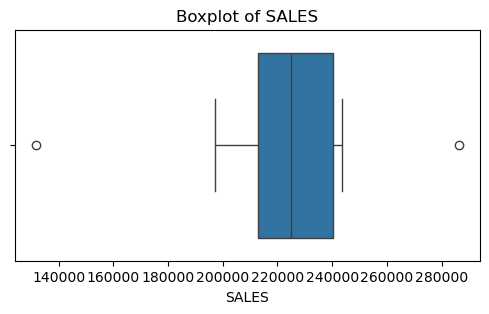

In [6]:
# Create a boxplot for the 'SALES' column
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_bangi['SALES'])
plt.title('Boxplot of SALES')
plt.xlabel('SALES')
plt.show()

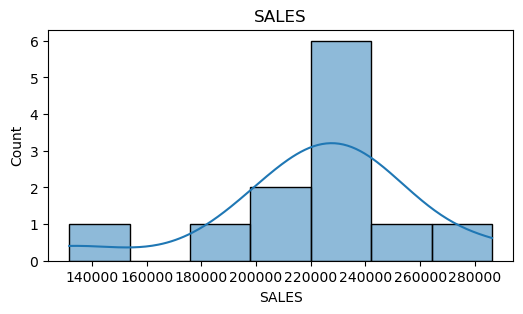

In [7]:
# Plotting the histogram for 'TOT_SALES' column
plt.figure(figsize=(6, 3))
sns.histplot(data_bangi['SALES'], kde=True)
plt.title('SALES')
plt.show()

In [8]:
if (data_bangi['SALES'] <= 0).any():
    # If there are zero or negative values, add a constant to handle it
    data_bangi['SALES'] = data_bangi['SALES'] + 1

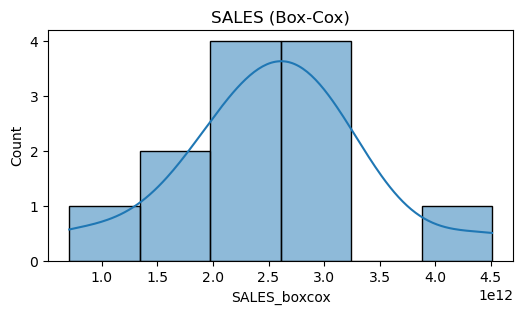

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data_bangi['SALES_boxcox'], lambda_ = stats.boxcox(data_bangi['SALES'])

# Plotting the histogram for 'TOT_SALES' column after Box-Cox transformation
plt.figure(figsize=(6, 3))
sns.histplot(data_bangi['SALES_boxcox'], kde=True)
plt.title('SALES (Box-Cox)')
plt.show()

In [10]:
data_bangi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SALES                12 non-null     float64
 1   COST_OF_GOODS        12 non-null     float64
 2   CO_SEC_FEE           12 non-null     float64
 3   SOCIAL_SECURITY_FEE  12 non-null     float64
 4   FIX_FEE              12 non-null     float64
 5   STAFF_EXPENSES       12 non-null     float64
 6   MISCELLANEOUS_FEES   12 non-null     float64
 7   SHOP_EXPENSES        12 non-null     float64
 8   WATER_BILL           12 non-null     float64
 9   ELECTRIC_BILL        12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  SALES_boxcox         12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


In [11]:
# Display the 'SALES' and 'SALES_boxcox' columns
data_bangi[['SALES', 'SALES_boxcox']]

,SALES,SALES_boxcox
0,240988.21,2.990502e+12
1,197193.68,1.852321e+12
2,200267.03,1.922017e+12
3,131700.85,7.063766e+11
4,217116.51,2.331025e+12
5,224445.28,2.523368e+12
6,240321.89,2.970792e+12
7,237056.41,2.875291e+12
8,225681.18,2.556680e+12
9,222068.63,2.460021e+12


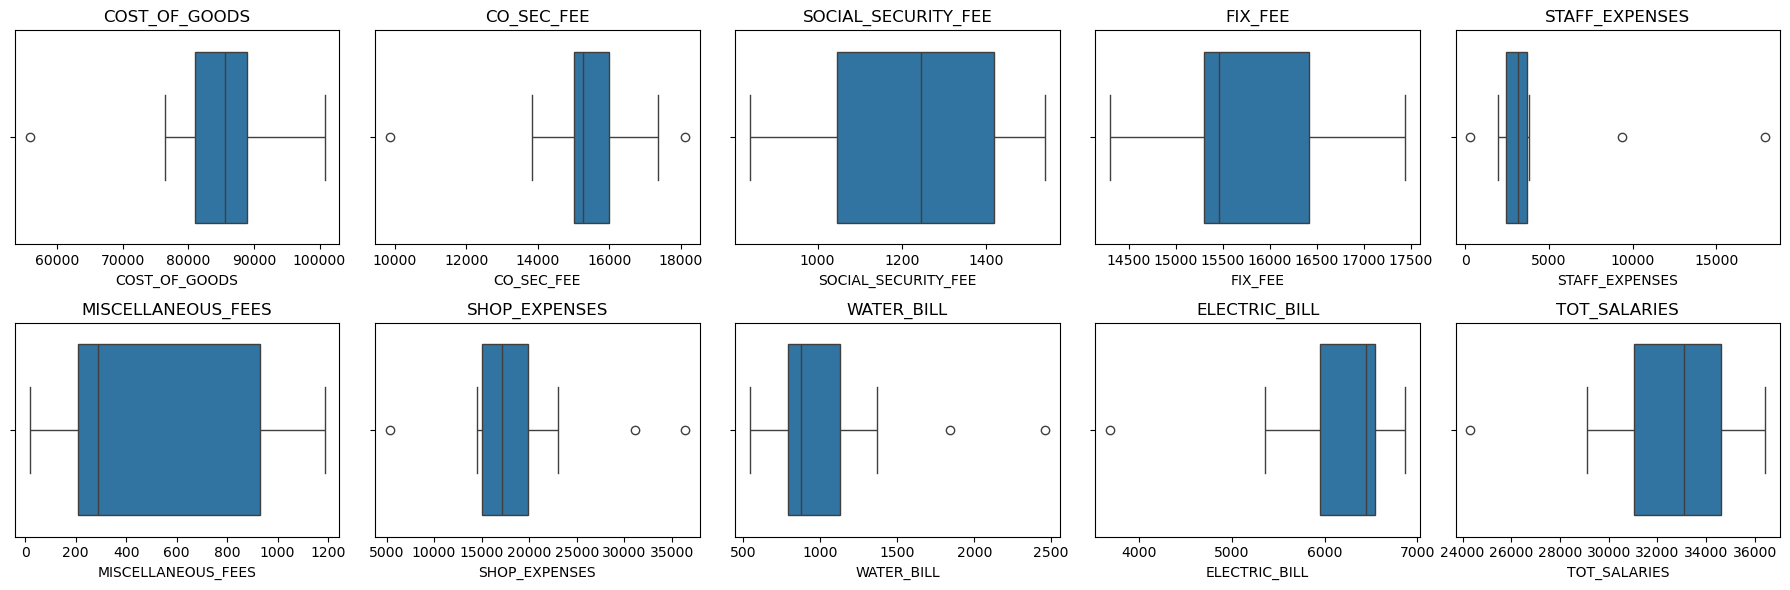

In [12]:
# Assuming data_bangi is your DataFrame, and columns is the list of column names you want to plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_bangi[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

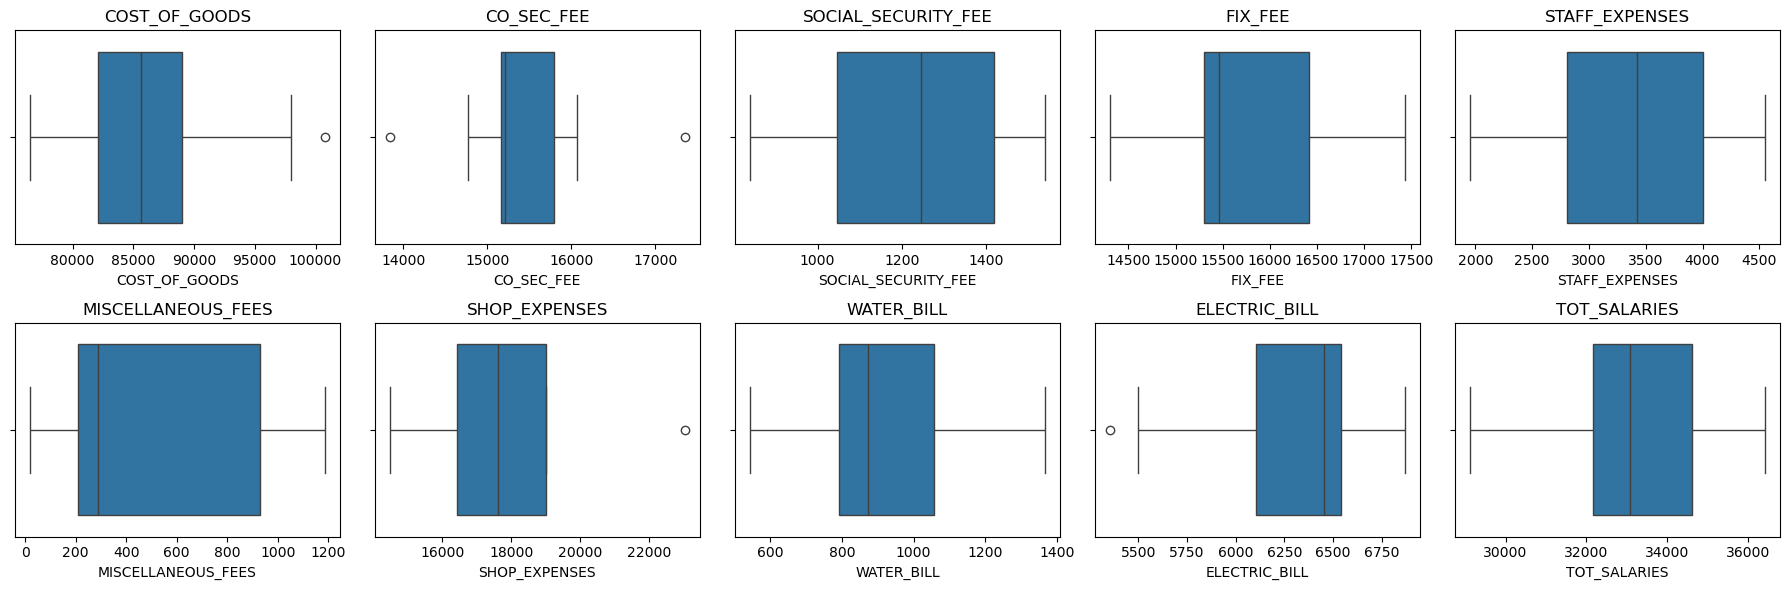

In [13]:
# Assuming data_bangi is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).ffill().bfill()
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_bangi, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_bangi[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()


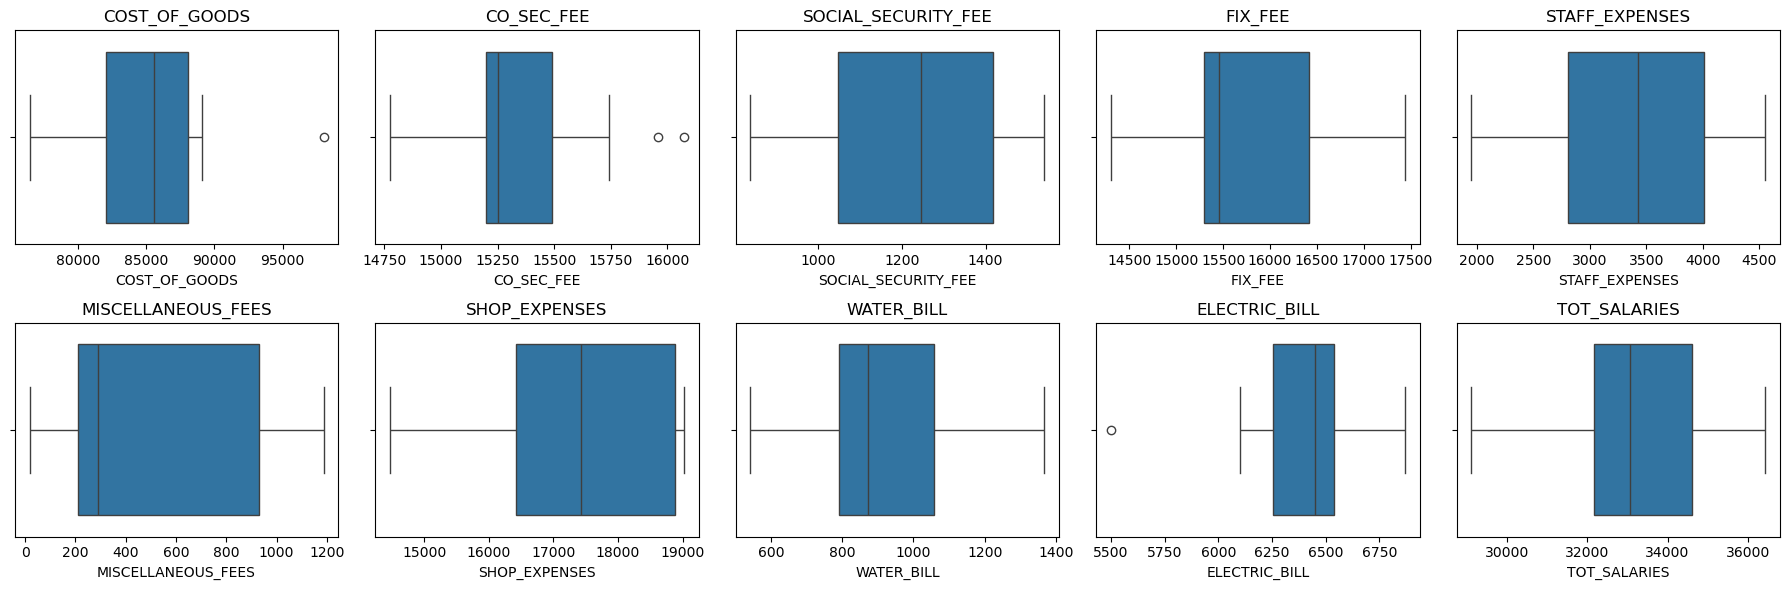

In [14]:
# Assuming data_bangi is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).ffill().bfill()
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_bangi, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_bangi[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

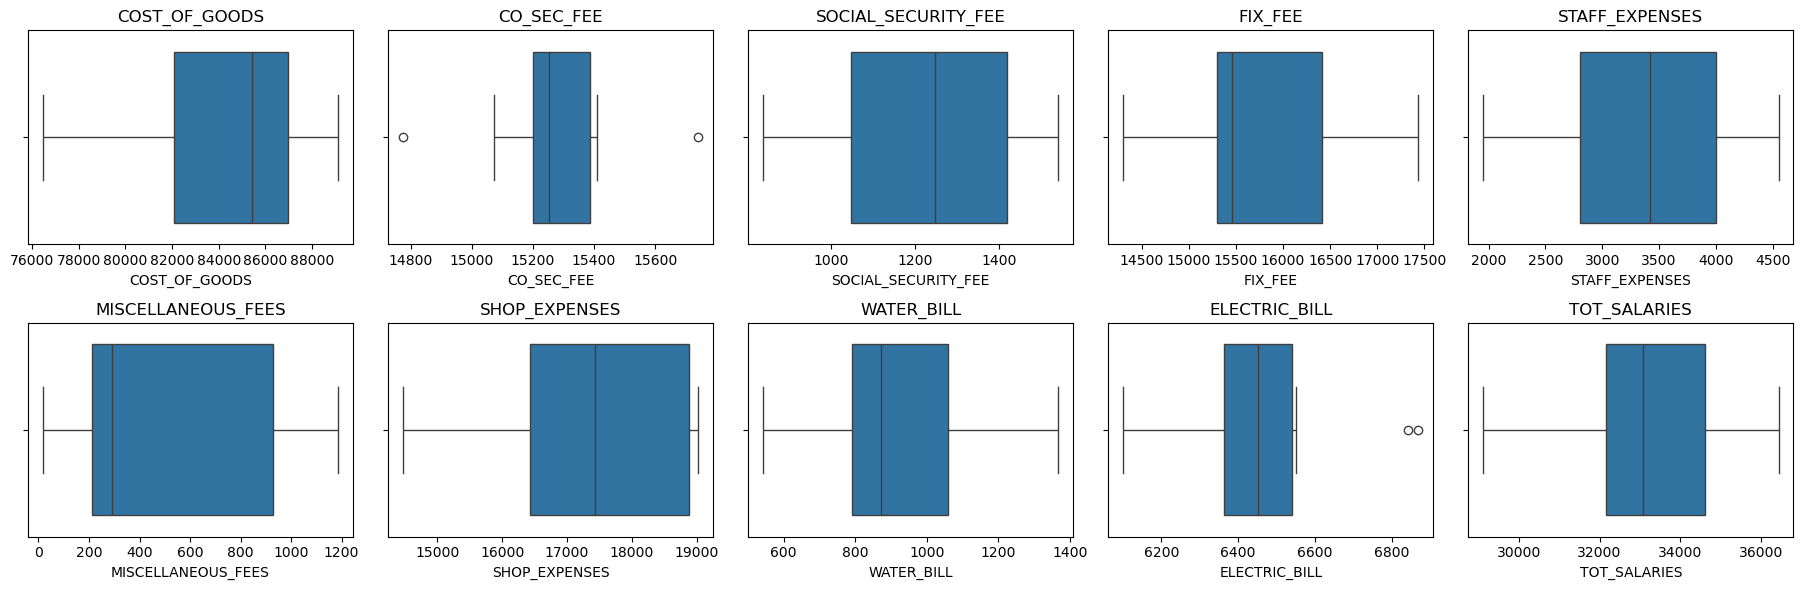

In [15]:
# Assuming data_bangi is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).ffill().bfill()
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_bangi, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_bangi[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

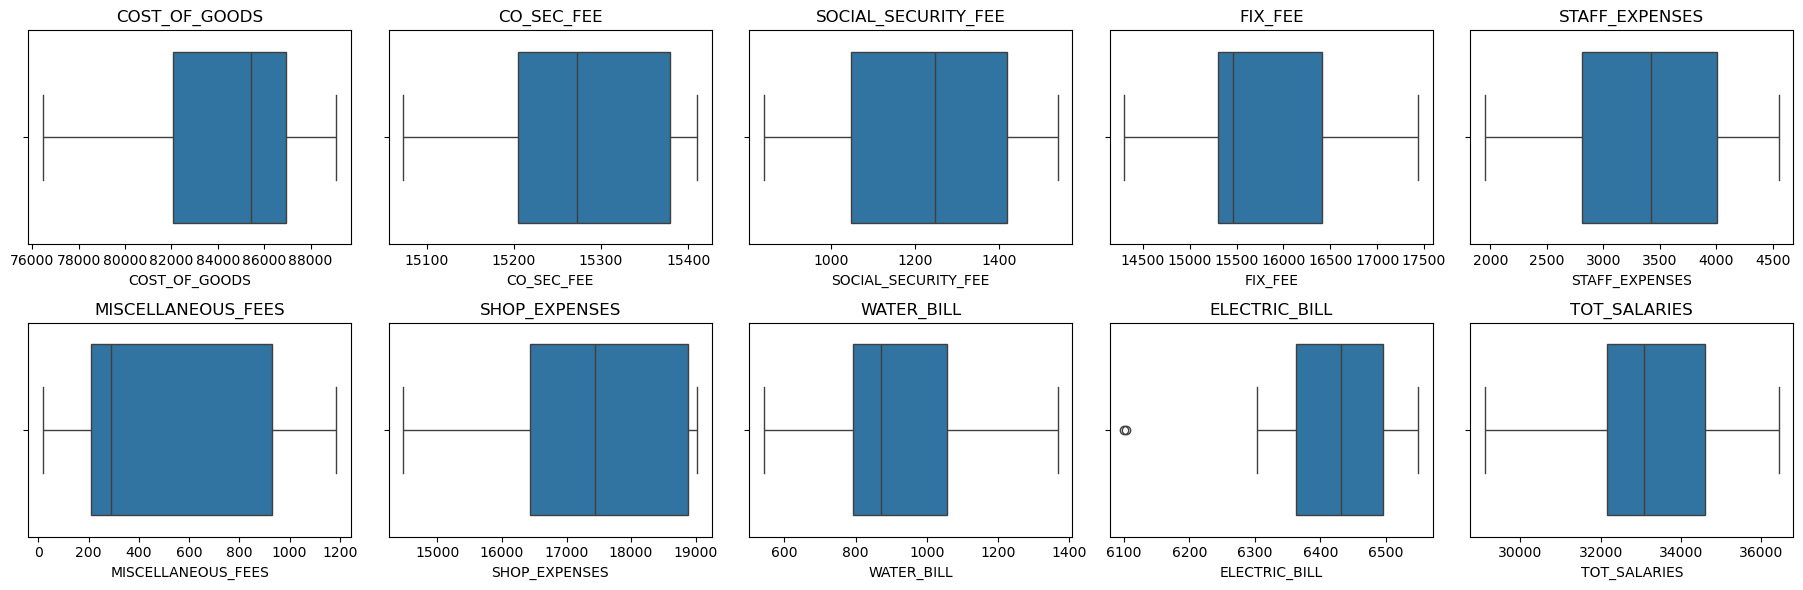

In [16]:
# Assuming data_bangi is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).ffill().bfill()
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_bangi, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_bangi[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

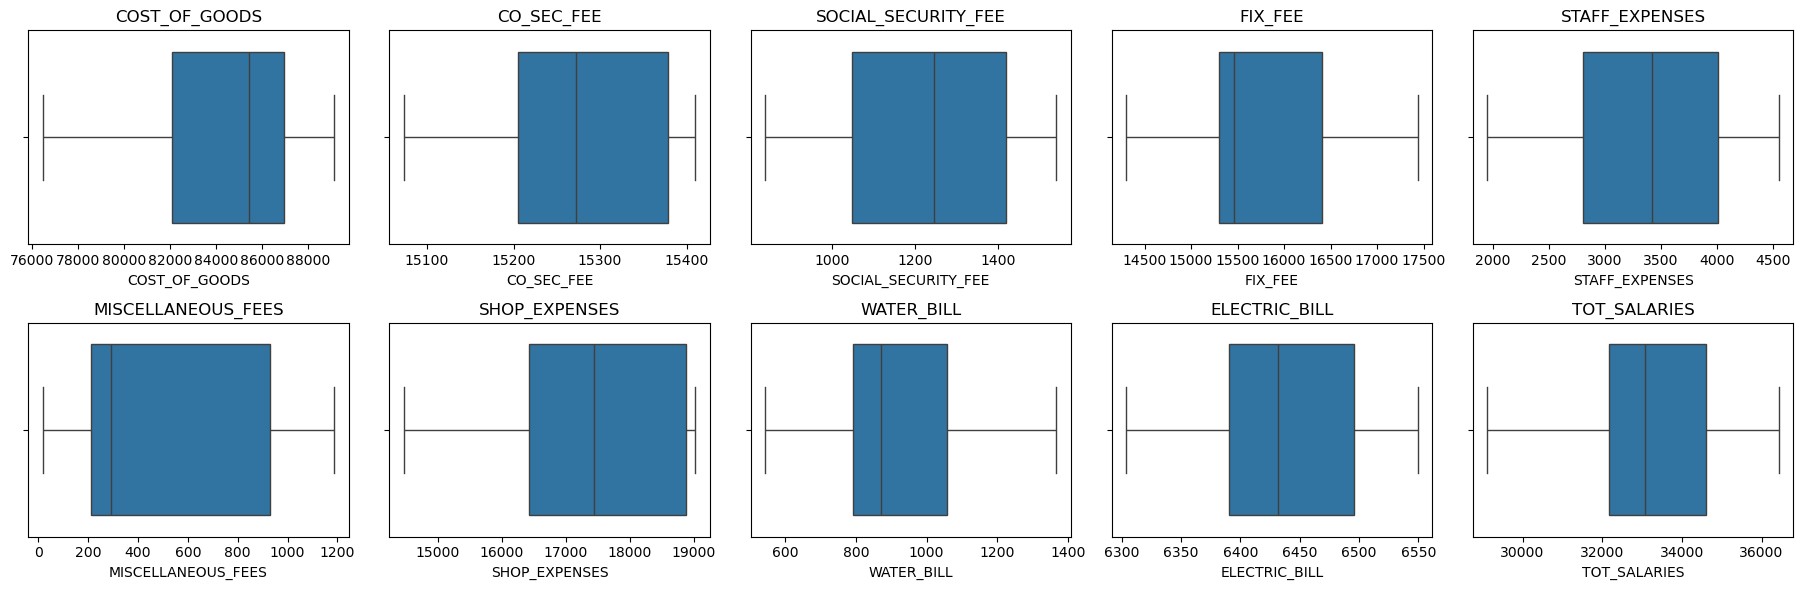

In [17]:
# Assuming data_bangi is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).ffill().bfill()
        # data_bangi[columns] = data_bangi[columns].mask((data_bangi[columns] < lower_bound) | (data_bangi[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_bangi, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_bangi[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

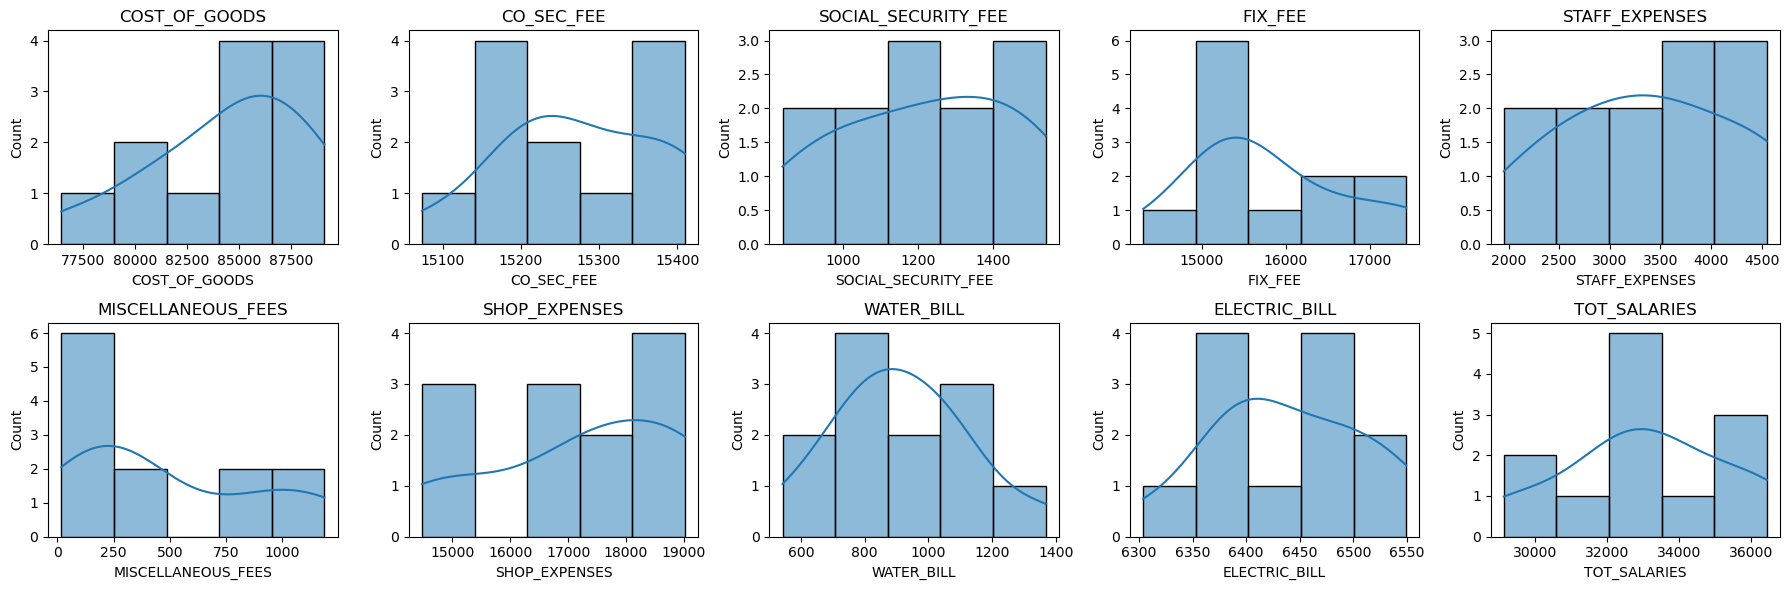

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_kajang is your DataFrame and columns is the list of column names you want to plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.histplot(data_bangi[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [19]:
data_bangi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SALES                12 non-null     float64
 1   COST_OF_GOODS        12 non-null     float64
 2   CO_SEC_FEE           12 non-null     float64
 3   SOCIAL_SECURITY_FEE  12 non-null     float64
 4   FIX_FEE              12 non-null     float64
 5   STAFF_EXPENSES       12 non-null     float64
 6   MISCELLANEOUS_FEES   12 non-null     float64
 7   SHOP_EXPENSES        12 non-null     float64
 8   WATER_BILL           12 non-null     float64
 9   ELECTRIC_BILL        12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  SALES_boxcox         12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


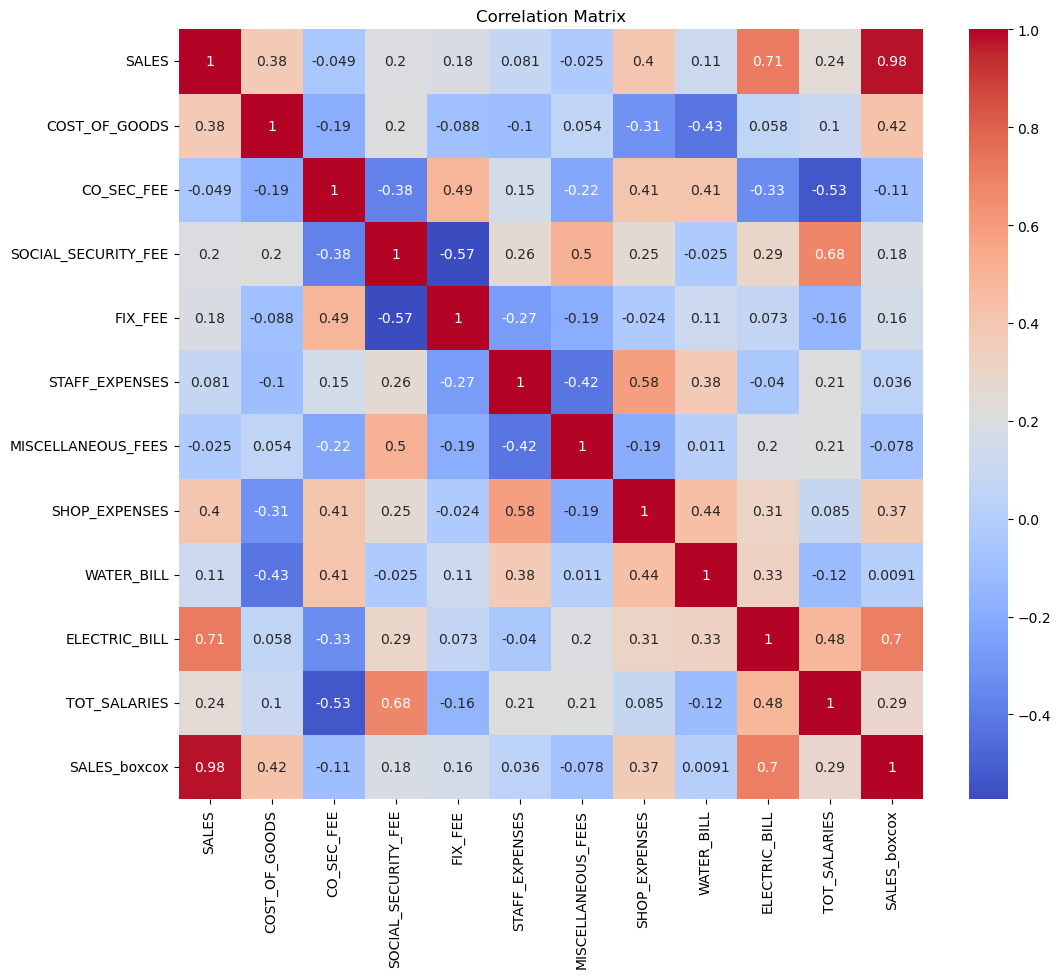

In [20]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_bangi.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
data_bangi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SALES                12 non-null     float64
 1   COST_OF_GOODS        12 non-null     float64
 2   CO_SEC_FEE           12 non-null     float64
 3   SOCIAL_SECURITY_FEE  12 non-null     float64
 4   FIX_FEE              12 non-null     float64
 5   STAFF_EXPENSES       12 non-null     float64
 6   MISCELLANEOUS_FEES   12 non-null     float64
 7   SHOP_EXPENSES        12 non-null     float64
 8   WATER_BILL           12 non-null     float64
 9   ELECTRIC_BILL        12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  SALES_boxcox         12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


# Simple Linear Regression

In [23]:
#define x and y
x_simple=data_bangi['ELECTRIC_BILL'].values
y_simple=data_bangi['SALES'].values

In [24]:
print(x_simple)

[6456.74597078 6456.74597078 6390.37863257 6303.94479167 6383.06935764
 6494.55       6390.37863257 6395.75       6497.9        6406.9
 6549.3        6536.4       ]


In [25]:
print(y_simple)

[240988.21 197193.68 200267.03 131700.85 217116.51 224445.28 240321.89
 237056.41 225681.18 222068.63 243659.29 286279.43]


In [37]:
#split dataset into training and testing 
x_simple_train, x_simple_test, y_simple_train, y_simple_test = train_test_split(x_simple, y_simple, test_size = 0.2, random_state = 42)

# train model
sl = LinearRegression()
sl.fit(x_simple_train.reshape(-1, 1), y_simple_train)

# Predict result
y_simple_pred = sl.predict(x_simple_test.reshape(-1, 1))
print(y_simple_pred)


[267725.66754501 209251.91797356 229720.18210467]


In [38]:
# Evaluate the model
r2_simple = r2_score(y_simple_test, y_simple_pred)
mse_simple = mean_squared_error(y_simple_test, y_simple_pred)
mae_simple = mean_absolute_error(y_simple_test, y_simple_pred)

print(f'R²: {r2_simple}')
print(f'MSE: {mse_simple}')
print(f'MAE: {mae_simple}')

R²: -2.1414220777586017
MSE: 290142362.65248805
MAE: 16050.372488924671


In [39]:
# Create a DataFrame with Actual and Predicted values
pred_y_data_bangi_simple = pd.DataFrame({'Actual Value': y_simple_test, 'Predicted Value': y_simple_pred})
pred_y_data_bangi_simple

,Actual Value,Predicted Value
0,243659.29,267725.667545
1,222068.63,209251.917974
2,240988.21,229720.182105


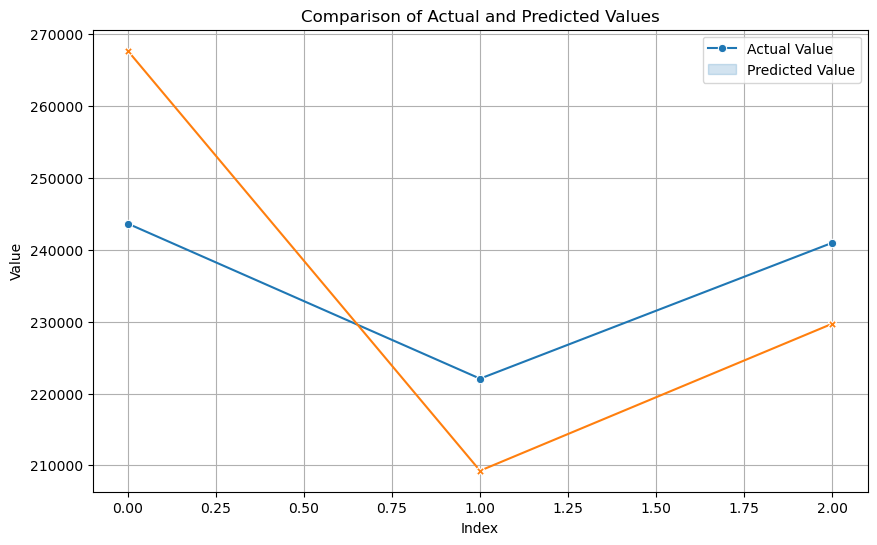

In [40]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_y_data_bangi_simple, markers=True, dashes=False)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual Value', 'Predicted Value'])
plt.grid(True)

plt.show()

In [41]:
# Randomly select 3 samples from x_test_simple
random_indices_simple = np.random.choice(len(x_simple_test), size=3, replace=False)
random_x_simple_test = x_simple_test[random_indices_simple]

# Repeat the selected samples 4 times to simulate data for the next 4 months
x_future_simple = np.tile(random_x_simple_test, (4, 1))

# Predict the sales for the next 4 months
y_simple_pred = sl.predict(x_future_simple.reshape(-1, 1))
y_simple_pred

array([229720.18210467, 267725.66754501, 209251.91797356, 229720.18210467,
       267725.66754501, 209251.91797356, 229720.18210467, 267725.66754501,
       209251.91797356, 229720.18210467, 267725.66754501, 209251.91797356])

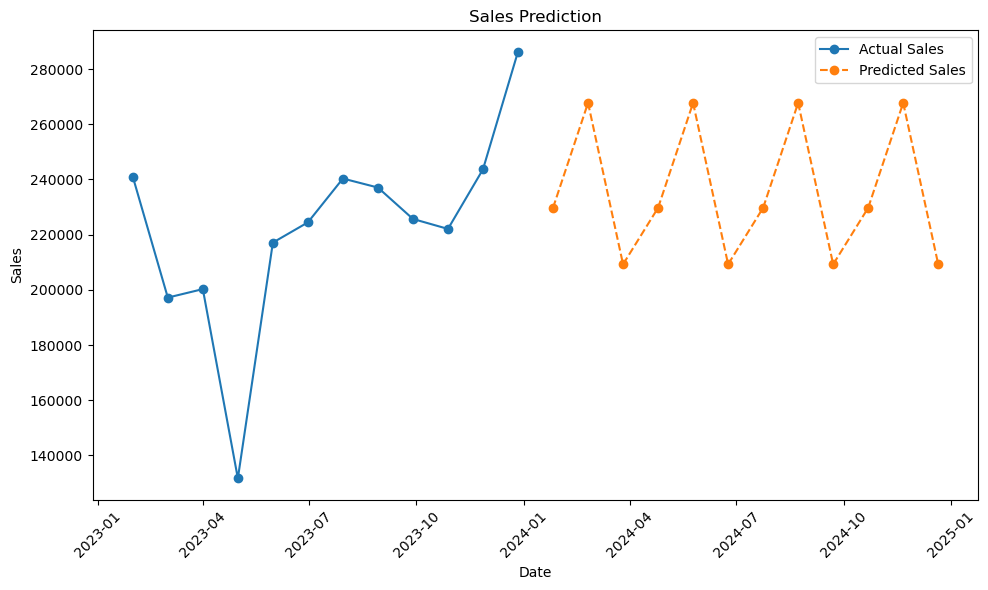

In [42]:
# Get the actual sales data
sales_simple = data_bangi['SALES'].values

# Create dates for the actual data (assuming the last day of each month)
start_date_simple = datetime(2023, 1, 31)
dates_simple = [start_date_simple + timedelta(days=30 * i) for i in range(len(sales_simple))]

# Create dates for the next 12 months
future_dates_simple = [dates_simple[-1] + timedelta(days=30 * i) for i in range(1, 13)]

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(dates_simple, sales_simple, marker='o', label='Actual Sales')
plt.plot(future_dates_simple, y_simple_pred, marker='o', linestyle='dashed', label='Predicted Sales')

# Add labels and title
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # 旋转x轴标签以便于阅读

# Show the plot
plt.tight_layout()
plt.show()

# Multiple Linear Regression

In [43]:
#define x and y
x=data_bangi.drop(['SALES_boxcox'], axis=1).values
y=data_bangi['SALES_boxcox'].values

In [44]:
print(x)

[[2.40988210e+05 8.55038293e+04 1.54098944e+04 9.07900000e+02
  1.74043100e+04 1.95184000e+03 2.15500000e+02 1.68671600e+04
  9.85500000e+02 6.45674597e+03 2.94682100e+04]
 [1.97193680e+05 7.64587900e+04 1.54098944e+04 9.82000000e+02
  1.65400800e+04 4.55216667e+03 1.76000000e+01 1.90206083e+04
  1.36750000e+03 6.45674597e+03 3.31666600e+04]
 [2.00267030e+05 8.23102700e+04 1.53788635e+04 1.39610000e+03
  1.63675500e+04 3.82371000e+03 9.29300000e+02 1.90206083e+04
  1.04660000e+03 6.39037863e+03 3.31432200e+04]
 [1.31700850e+05 8.43047342e+04 1.52061617e+04 1.06895000e+03
  1.50892300e+04 2.50926000e+03 3.43240000e+02 1.44712500e+04
  5.42550000e+02 6.30394479e+03 3.23914258e+04]
 [2.17116510e+05 8.53493400e+04 1.52727633e+04 1.13180000e+03
  1.43030600e+04 4.55216667e+03 1.05400000e+02 1.77104429e+04
  1.09203750e+03 6.38306936e+03 2.91192500e+04]
 [2.24445280e+05 8.91174200e+04 1.51912800e+04 1.54005000e+03
  1.52584000e+04 3.01959000e+03 1.18630000e+03 1.48654100e+04
  1.09203750e+03

In [45]:
print(y)

[2.99050209e+12 1.85232110e+12 1.92201700e+12 7.06376632e+11
 2.33102523e+12 2.52336822e+12 2.97079210e+12 2.87529134e+12
 2.55668022e+12 2.46002136e+12 3.07027545e+12 4.51206793e+12]


In [74]:
#split dataset into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [75]:
# train model
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [76]:
# Predict result
y_pred = ml.predict(x_test)
print(y_pred)

[3.38297842e+12 2.97546216e+12 3.47164402e+12 2.87031486e+12]


In [77]:
# Evaluete the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R²: -1.4728368897116138
MSE: 1.7333165519142464e+23
MAE: 405730087704.2593


In [78]:
# Create a DataFrame with Actual and Predicted values
pred_y_data_bangi = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred_y_data_bangi

,Actual Value,Predicted Value
0,3.070275e+12,3.382978e+12
1,2.460021e+12,2.975462e+12
2,2.990502e+12,3.471644e+12
3,2.556680e+12,2.870315e+12


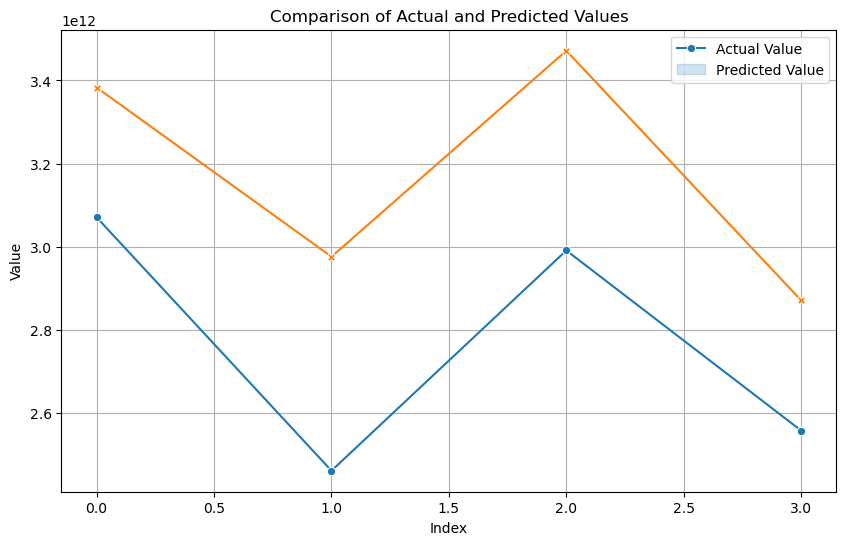

In [79]:
=

In [91]:
# Randomly select 3 samples from x_test
random_indices = np.random.choice(len(x_test), size=4, replace=False)
random_x_test = x_test[random_indices]

# Repeat the selected samples 5 times to simulate data for the next 5 months
x_future = np.tile(random_x_test, (3, 1))

# Predict the sales for the next 5 months
y_pred_boxcox = ml.predict(x_future)
y_pred_boxcox


array([2.97546216e+12, 3.38297842e+12, 3.47164402e+12, 2.87031486e+12,
       2.97546216e+12, 3.38297842e+12, 3.47164402e+12, 2.87031486e+12,
       2.97546216e+12, 3.38297842e+12, 3.47164402e+12, 2.87031486e+12])

In [92]:
# Reverse the Box-Cox transformation
def inv_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y) - 1
    else:
        return (np.exp(np.log(lambda_ * y + 1) / lambda_)) - 1

y_pred = inv_boxcox(y_pred_boxcox, lambda_)
y_pred

array([240478.99886023, 253756.98831484, 256520.81409359, 236883.53154429,
       240478.99886023, 253756.98831484, 256520.81409359, 236883.53154429,
       240478.99886023, 253756.98831484, 256520.81409359, 236883.53154429])

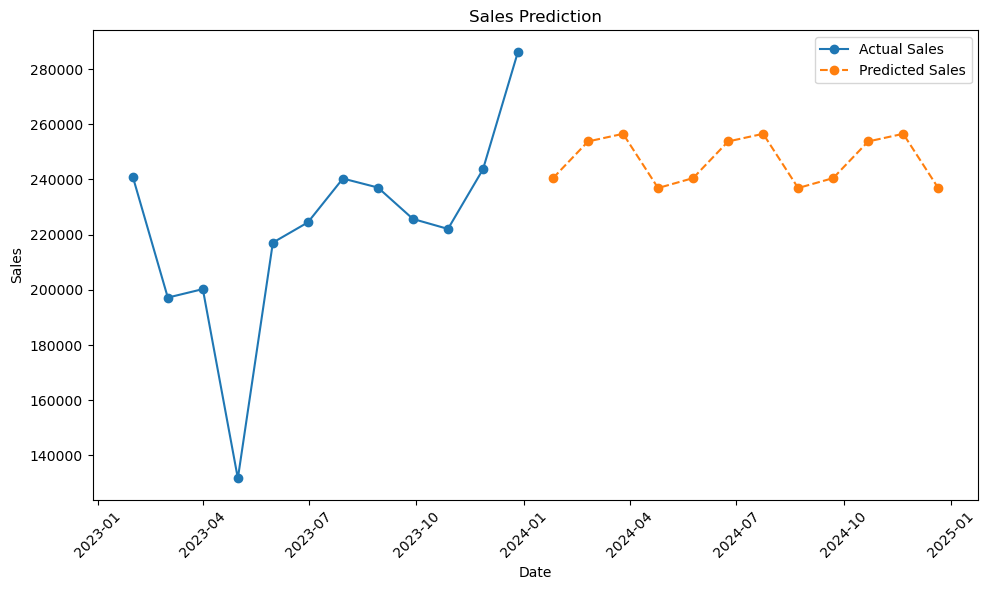

In [93]:
from datetime import datetime, timedelta

# Get the actual sales data
sales = data_bangi['SALES'].values

# Create dates for the actual data (assuming the last day of each month)
start_date = datetime(2023, 1, 31)
dates = [start_date + timedelta(days=30 * i) for i in range(len(sales))]

# Create dates for the next 5 months
future_dates = [dates[-1] + timedelta(days=30 * i) for i in range(1, 13)]

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(dates, sales, marker='o', label='Actual Sales')
plt.plot(future_dates, y_pred, marker='o', linestyle='dashed', label='Predicted Sales')

# Add labels and title
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()
